* After refitting MS with full mass range, and 
* redefining cut between normal and low SFR using where two gaussians overlap
* expanding cluster sample to not be restricted to where the mips scans were
* change B/T cut from 0.4 to 0.3

# To do 

1. [DONE] potentially refitting the main sequence; (Rose)
  * before: everything above mass and sSFR limit
  * try fitting to everything, with salim sSFR cut to get a relationship closer to
  $$ logSFR = 0.6(logMstar-11) - 0.57 $$
  this is what we eyeballed from topcat.
1. [DONE] using our double Gaussian fits to set up a boundary that is parallel to the MS, and offset based on the point where the two Gaussian fits cross.  this is not where the min is of the joint profile.  Need to plot each gaussian individually, then find where they cross (equal contribution from both populations), then fit a lit to these points vs logMstar; (Rose)
1. describing this process in the paper; (Greg and Benedetta)
1. Once we refit the main sequence, we need to recalculate the suppressed fractions and delta_sfr, and update the corresponding 
 1. plots and 
 2. numbers in the text.  (Rose)
1. implement mass matching throughout.  use Nfield/N_LCS to pick how many galaxies we select from field sample for mass matching. (Rose)
1. updating numbers in the paper accordingly; (Rose)
1. hopefully not having to update any of our conclusions:-) (Greg and Benedetta)
1. need to update for no BT cut and BT< 0.3 cut, and propagate. (Rose)
1. read through overleaf, and update discussion as necessary. (Greg and Benedetta)

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import os
import sys
import warnings
warnings.filterwarnings('ignore')

import time

from scipy.stats import ks_2samp

from astropy.io import fits,ascii
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
homedir = os.getenv("HOME")

In [9]:
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75 --HIdef --minssfr -11.2 --cutBT --BT 0.3

outfile =  /Users/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1305 1305 1305 1305
STD of pruned data = 0.15
STD of full data = 0.18
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.52
Best-fit inter = -5.32
Width of the MS = 0.18 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.52+/-0.05
Best-fit inter = -5.32+/-0.52


# Statistics

DONE - NEED TO REDO WITH MASS MATCHING ONLY

In [38]:
# write the tables that will be used to make the latex table

os.chdir(homedir+'/research/LCS/tables/')
%run ~/github/LCS/python/lcs_paper2_v2.py --ellip 0.75 --minmass 9.7 --minssfr -11.5
b.ks_stats(massmatch=True)

outfile =  /Users/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
STD of pruned data = 0.19
STD of full data = 0.20
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.39
Best-fit inter = -4.07
Width of the MS = 0.20 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.39+/-0.06
Best-fit inter = -4.07+/-0.56


In [49]:
os.chdir(homedir+'/research/LCS/plots/')

%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75 --HIdef --minssfr -11.2
print('number of core galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag & b.lcs.sampleflag))
print('number of infall galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag & b.lcs.sampleflag))
print('number of GSW galaxies = ',sum(b.gsw_mass_sfr_flag) )

print()
print('############# WITH BT CUT ###################')
print()
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75 --HIdef --minssfr -11.2 --cutBT --BT 0.3
print('number of core galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag & b.lcs.sampleflag))
print('number of infall galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag & b.lcs.sampleflag))
print('number of GSW galaxies = ',sum(b.gsw_mass_sfr_flag) )

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
STD of pruned data = 0.21
STD of full data = 0.23
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.30
Best-fit inter = -3.25
Width of the MS = 0.23 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.30+/-0.06
Best-fit inter = -3.25+/-0.59
number of core galaxies =  146
	 with size measurements =  --
number of infall galaxies =  374
	 with size measurements =  --
number of GSW galaxies =  11110

############# WITH BT CUT ###################

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_

### Number with HI detections

In [52]:
os.chdir(homedir+'/research/LCS/plots/')

%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75 --HIdef --minssfr -11.2
print('number of core galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag & b.lcs.cat['HIdef_flag']))

print('number of infall galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag & b.lcs.cat['HIdef_flag']))

print('number of GSW galaxies = ',sum(b.gsw_mass_sfr_flag & b.gsw.HIdef['HIdef_flag']) )

print()
print('############# WITH BT CUT ###################')
print()
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75 --HIdef --minssfr -11.2 --cutBT --BT 0.3
print('number of core galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag & b.lcs.cat['HIdef_flag']))

print('number of infall galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag & b.lcs.cat['HIdef_flag']))

print('number of GSW galaxies = ',sum(b.gsw_mass_sfr_flag & b.gsw.HIdef['HIdef_flag']) )

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
STD of pruned data = 0.21
STD of full data = 0.23
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.30
Best-fit inter = -3.25
Width of the MS = 0.23 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.30+/-0.06
Best-fit inter = -3.25+/-0.59
number of core galaxies =  23
number of infall galaxies =  93
number of GSW galaxies =  3149

############# WITH BT CUT ###################

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1305 1305 1305 1305
STD of prune

# Table 1

In [9]:
%%time

os.chdir(homedir+'/research/LCS/tables/')
%run ~/github/LCS/python/writelatexstats.py

t = writetable()
t.read_tables()
t.open_output()
t.get_stats()
t.write_header()
t.write_data()
t.write_footer()
t.close_output()

########################################
LCS Core vs Field: SFR
	D = 3.17e-01, pvalue = 4.24e-17
Anderson_ksampResult(statistic=77.25191113221709, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

LCS Core vs Field: dSFR
	D = 3.16e-01, pvalue = 5.40e-17
Anderson_ksampResult(statistic=74.02431097166408, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

LCS Core vs Field: Mstar
	D = 1.23e-01, pvalue = 6.17e-03
Anderson_ksampResult(statistic=5.953642675951121, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.0016038571241014919)

LCS Core vs Field: BT
	D = 2.11e-01, pvalue = 8.39e-08
Anderson_ksampResult(statistic=5.953642675951121, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.0016038571241014919)
########################################
LCS Infall vs Field: SFR
	D = 2.31e-01, pvalue = 1.02e-19

<Figure size 489.6x360 with 0 Axes>

In [36]:
%%time

os.chdir(homedir+'/research/LCS/tables/')
%run ~/github/LCS/python/writelatexstats-massmatch.py

t = writetable()
t.read_tables()
t.open_output()
t.get_stats()
t.write_header()
t.write_data()
t.write_footer()
t.close_output()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/rfinn/research/LCS/tables//LCS-sfr-mstar-core.fits'

<Figure size 489.6x360 with 0 Axes>

#  Figure 1

outfile =  /Users/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
STD of pruned data = 0.19
STD of full data = 0.20
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.39
Best-fit inter = -4.07
Width of the MS = 0.20 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.39+/-0.06
Best-fit inter = -4.07+/-0.56
number in lcs sample =  139
number in gsw sample =  11150
just checking ... 11149 139
9.701
9.702
############################################################ 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.13
p-vale = 2.315e-02 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.21
p-vale = 4.944e-06 (prob that samples are from same distribut

<AxesSubplot:xlabel='$\\rm \\log_{10}(M_\\star/M_\\odot) $', ylabel='$\\rm \\log_{10}(SFR)$'>

<Figure size 489.6x360 with 0 Axes>

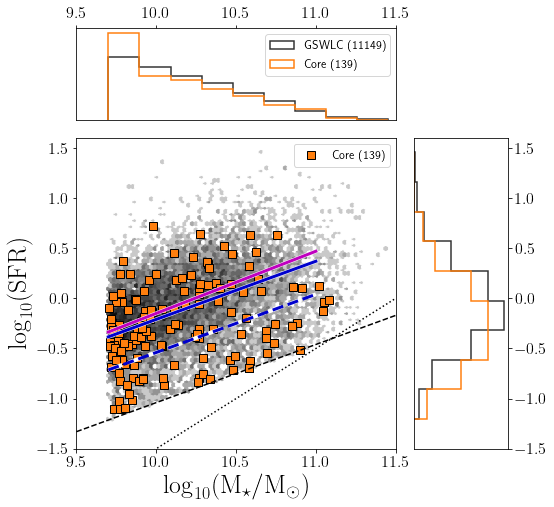

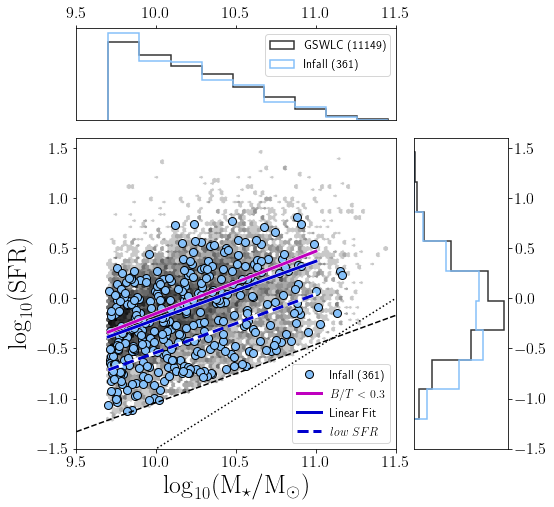

In [35]:
%%time
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --ellip 0.75 --minmass 9.7 --minssfr -11.5

flag = b.lcs.membflag 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut1-e0p75-mmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut1-e0p75-mmatch.png'
b.plot_sfr_mstar(lcsflag=flag,coreflag=True,plotMS=True,plotlegend=False,outfile1=outfile1,outfile2=outfile2,massmatch=False,hexbinflag=True,marker2='s')

print("")
print("")
flag = b.lcs.infallflag 
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut1-e0p75-mmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut1-e0p75-mmatch.png'
b.plot_sfr_mstar(lcsflag=flag,label='Infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,hexbinflag=True,massmatch=False)


## With BT cut

outfile =  /Users/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1305 1305 1305 1305
STD of pruned data = 0.15
STD of full data = 0.17
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.52
Best-fit inter = -5.32
Width of the MS = 0.17 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.52+/-0.05
Best-fit inter = -5.32+/-0.52
number in lcs sample =  85
number in gsw sample =  7575
just checking ... 2550 85
9.701
9.702
############################################################ 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.07
p-vale = 7.305e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =  

<AxesSubplot:xlabel='$\\rm \\log_{10}(M_\\star/M_\\odot) $', ylabel='$\\rm \\log_{10}(SFR)$'>

<Figure size 489.6x360 with 0 Axes>

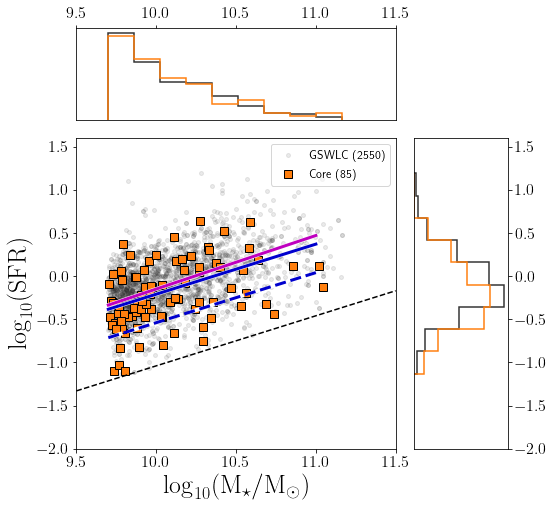

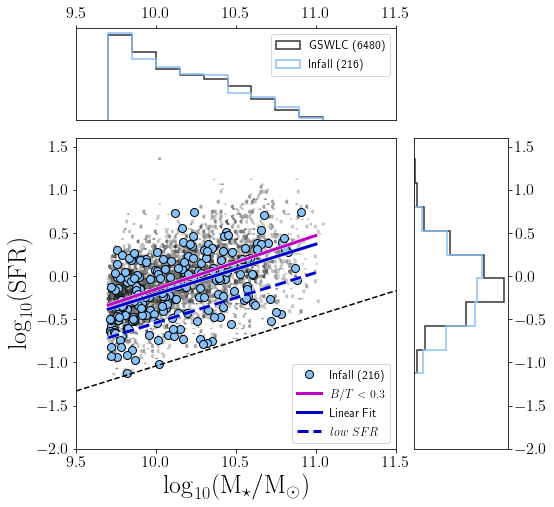

In [21]:
%%time
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --ellip 0.75 --minmass 9.7 --minssfr -11.2 --cutBT --BT 0.3

flag = b.lcs.membflag 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut03-e0p75-mmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut03-e0p75-mmatch.png'
b.plot_sfr_mstar(lcsflag=flag,coreflag=True,plotMS=True,plotlegend=False,outfile1=outfile1,outfile2=outfile2,massmatch=True,hexbinflag=False,marker2='s')

print("")
print("")
flag = b.lcs.infallflag 
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut03-e0p75-mmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut03-e0p75-mmatch.png'
b.plot_sfr_mstar(lcsflag=flag,label='Infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,hexbinflag=True,massmatch=True)


# Figure 2

outfile =  /Users/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
STD of pruned data = 0.19
STD of full data = 0.20
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.39
Best-fit inter = -4.07
Width of the MS = 0.20 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.39+/-0.06
Best-fit inter = -4.07+/-0.56

Field: median = 0.0288-0.0022+0.0026 (bootstrap)
Field: mean, std, std_err = 0.0113,0.3518,0.0029 


Core: median = -0.1209-0.0267+0.0390 (bootstrap)
Core: mean, std, std_err = -0.1312,0.3974,0.0337 


Infall: median = -0.1100-0.0219+0.0531 (bootstrap)
Infall: mean, std, std_err = -0.1073,0.3819,0.0201 

KS STATISTICS: FIELD VS CORE
KstestResult(statistic=0.19148441247002396, pvalue=6.617279388862363e-05

<Figure size 489.6x360 with 0 Axes>

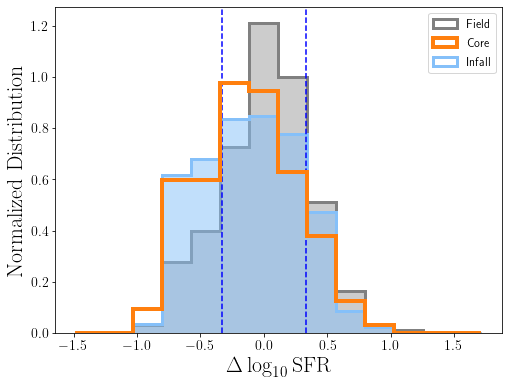

In [22]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7 --ellip 0.75 --minssfr -11.2
outfile1 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut1-e0p75-mmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut1-e0p75-mmatch.png'
b.plot_dsfr_hist(outfile1=outfile1,outfile2=outfile2,massmatch=True,nbins=15)

# Figure 3

outfile =  /Users/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
STD of pruned data = 0.19
STD of full data = 0.20
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.39
Best-fit inter = -4.07
Width of the MS = 0.20 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.39+/-0.06
Best-fit inter = -4.07+/-0.56
CORE
frac suppressed = 0.309, -0.038,0.040
INFALL
0.31301939058171746 [-0.02386167  0.02489472]
FIELD
0.16046666666666667 [-0.00297421  0.00301948]
(2,)

#####  WITH BT CUT  ######

CORE
frac suppressed = 0.250, -0.044,0.050
INFALL
0.22748815165876776 [-0.02753476  0.03010563]
FIELD
0.1254 [-0.00267906  0.00272901]
(2,)


<Figure size 489.6x360 with 0 Axes>

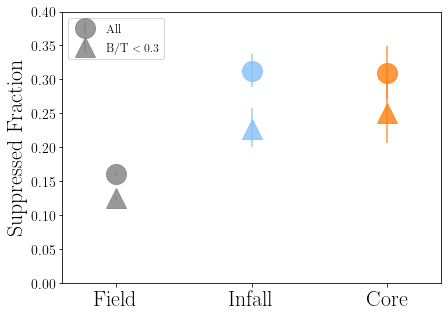

In [23]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75  --minssfr -11.2
outfile1 = homedir+'/research/LCS/plots/fsuppressed-btcut1-mmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/fsuppressed-btcut1-mmatch.png'
b.plot_frac_suppressed(massmatch=True)#outfile1=outfile1,outfile2=outfile2,nbins=12)
print()
print('#####  WITH BT CUT  ######')
print()
btcut = 0.3
b.plot_frac_suppressed(BTcut=btcut,plotsingle=False,massmatch=True)
plt.ylim(0,.4)
plt.legend([r'$\rm All$','_nolegend_','_nolegend_',r'$\rm B/T<0.3$'],loc='upper left')
plt.savefig(outfile1)
plt.savefig(outfile2)

# Figure 4

outfile =  /Users/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
STD of pruned data = 0.19
STD of full data = 0.20
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.39
Best-fit inter = -4.07
Width of the MS = 0.20 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.39+/-0.06
Best-fit inter = -4.07+/-0.56
Field : number of galaxies in normal sf subsample =  9264
2 2 3
Field : number of galaxies in suppressed sf subsample =  1886

Core : number of galaxies in normal sf subsample =  96
2 2 3
Core : number of galaxies in suppressed sf subsample =  43

Infall : number of galaxies in normal sf subsample =  248
2 2 3
Infall : number of galaxies in suppressed sf subsample =  113

Field : number of galaxies in nor

<Figure size 489.6x360 with 0 Axes>

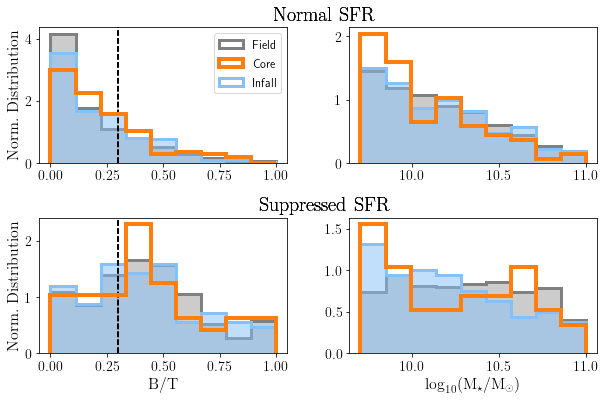

In [24]:
os.chdir(homedir+'/research/LCS/plots/')
btmax=1
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75  --minssfr -11.2

b.compare_morph(nbins=10,xmax=btmax,coreonly=False)#outfile1=outfile1,outfile2=outfile2,nbins=12)
outfile1 = homedir+'/research/LCS/plots/prop-lowsfr-lcsall-BTcut1-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/prop-lowsfr-lcsall-BTcut1-e0p75.png'
plt.savefig(outfile1)
plt.savefig(outfile2)

# Figure 5

outfile =  /Users/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
STD of pruned data = 0.19
STD of full data = 0.20
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.39
Best-fit inter = -4.07
Width of the MS = 0.20 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.39+/-0.06
Best-fit inter = -4.07+/-0.56
#######################################
comparing low SFR and mass-matched normal SFR
KstestResult(statistic=0.38877695298692116, pvalue=6.999725290116415e-249)
#######################################
comparing normal SFR and normal SFR mass-matched to low SFR
KstestResult(statistic=0.07272897103830245, pvalue=4.589817205528363e-37)


<Figure size 489.6x360 with 0 Axes>

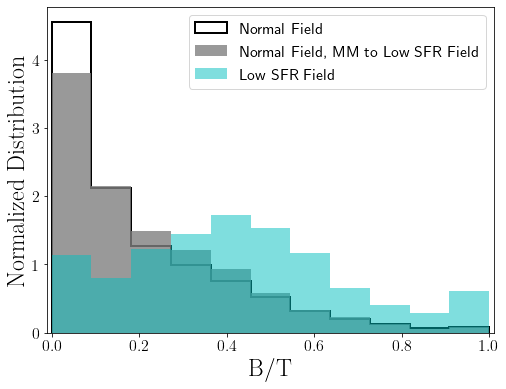

In [25]:
%%time 
os.chdir(homedir+'/research/LCS/plots/')
btmax=1
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7  --ellip .75 --minssfr -11.2

b.compare_BT_lowsfr_field(nbins=12,BTmax=btmax)#outfile1=outfile1,outfile2=outfile2,nbins=12)
outfile1 = homedir+'/research/LCS/plots/morphhist-field-normal-lowsfr.pdf'
outfile2 = homedir+'/research/LCS/plots/morphhist-field-normal-lowsfr.png'
plt.savefig(outfile1)
plt.savefig(outfile2)

# Figure 6

outfile =  /Users/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
STD of pruned data = 0.19
STD of full data = 0.20
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.39
Best-fit inter = -4.07
Width of the MS = 0.20 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.39+/-0.06
Best-fit inter = -4.07+/-0.56

Field
r=nan, pvalue=nan

Core
r=-0.3110, pvalue=1.328e-04

Infall
r=nan, pvalue=nan

 Combined Samples: Spearman Rank
CPU times: user 5.35 s, sys: 367 ms, total: 5.71 s
Wall time: 4.75 s


<Figure size 489.6x360 with 0 Axes>

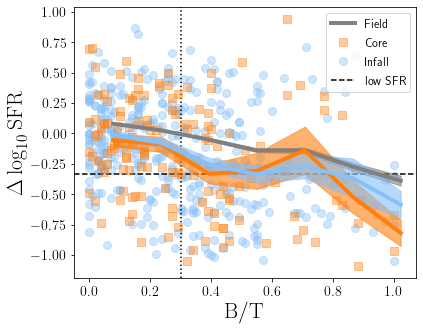

In [26]:
%%time 
os.chdir(homedir+'/research/LCS/plots/')
btmax=1.1
nbins=8

#btmax=1
#nbins=7
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7 --ellip 0.75 --minssfr -11.2


xvars,yvars = b.plot_dsfr_BT(nbins=nbins,xmax=btmax,writefiles=True,nsersic_cut=10,BTline=.3)#outfile1=outfile1,outfile2=outfile2,nbins=12)
outfile1 = homedir+'/research/LCS/plots/dsfr-BTcut1-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/dsfr-BTcut1-e0p75.png'
plt.savefig(outfile1)
plt.savefig(outfile2)


# Figure 7

outfile =  /Users/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1305 1305 1305 1305
STD of pruned data = 0.15
STD of full data = 0.17
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.52
Best-fit inter = -5.32
Width of the MS = 0.17 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.52+/-0.05
Best-fit inter = -5.32+/-0.52

Field: median = -0.0003-0.0025+0.0048 (bootstrap)
Field: mean, std, std_err = -0.0015,0.2873,0.0030 


Core: median = -0.1393-0.0378+0.0846 (bootstrap)
Core: mean, std, std_err = -0.1147,0.3466,0.0376 


Infall: median = -0.0717-0.0345+0.0185 (bootstrap)
Infall: mean, std, std_err = -0.0909,0.3365,0.0229 

KS STATISTICS: FIELD VS CORE

<Figure size 489.6x360 with 0 Axes>

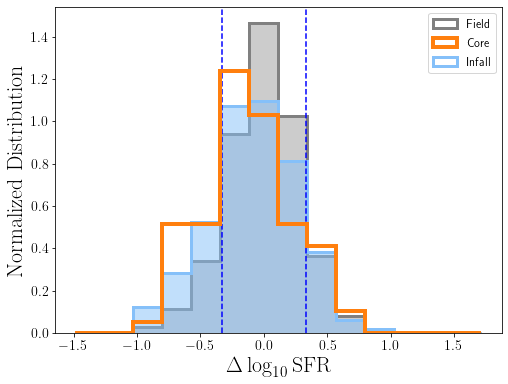

In [27]:
%%time 
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --cutBT --BT .3 --minmass 9.7 --ellip 0.75 --minssfr -11.2
outfile1 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut0p3-e0p75-mmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut0p3-e0p75-mmatch.png'
b.plot_dsfr_hist(outfile1=outfile1,outfile2=outfile2,massmatch=True)

# Figure 8

outfile =  /Users/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1305 1305 1305 1305
STD of pruned data = 0.15
STD of full data = 0.17
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.52
Best-fit inter = -5.32
Width of the MS = 0.17 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.52+/-0.05
Best-fit inter = -5.32+/-0.52

TESTING


TESTING

###################################################################
comparing LCS low SFR and mass-matched field low SFR: $\rm B/T$
statistic=0.12, pvalue=4.41e-01

anderson-darling test
Anderson_ksampResult(statistic=0.008071140999902804, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), sig

<Figure size 489.6x360 with 0 Axes>

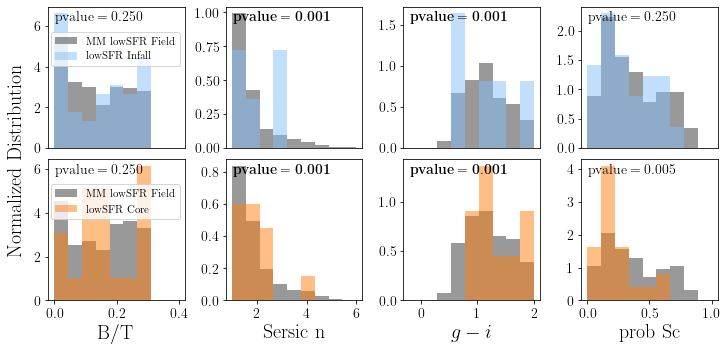

In [28]:
%%time
# compare BT of low SFR field galaxies with BT distribution of mass-matched normal SF field galaxies 
os.chdir(homedir+'/research/LCS/plots/')
btmax=.4
%run ~/github/LCS/python/lcs_paper2_v2.py --cutBT --BT 0.3 --minmass 9.7 --ellip 0.75 --minssfr -11.2  
#b.compare_BT_lowsfr_field_core(nbins=10,coreonly=False,BTmax=btmax)
#outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcsall-mmfield-BTcut0p4-e0p75.pdf'
#outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcsall-mmfield-BTcut0p4-e0p75.png'
#plt.savefig(outfile1)
#plt.savefig(outfile2)

print()
print('TESTING')
print()
plt.figure(figsize=(12,6))
plt.subplots_adjust(wspace=.3,bottom=.2,hspace=.08)



print()
print('TESTING')
print()
b.compare_BT_lowsfr_field_core(nbins=10,coreonly=False,infallonly=True,BTmax=btmax,plotsingle=False,nrow=2,show_xlabel=False)
#outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcsinfall-mmfield-BTcut0p4-e0p75.pdf'
#outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcsinfall-mmfield-BTcut0p4-e0p75.png'

b.compare_BT_lowsfr_field_core(nbins=10,coreonly=True,BTmax=btmax,plotsingle=False,nrow=2,subplot_offset=4)
#outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcscore-mmfield-BTcut0p4-e0p75.pdf'
#outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcscore-mmfield-BTcut0p4-e0p75.png'
#plt.savefig(outfile1)
#plt.savefig(outfile2)

outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcscore-infall-mmfield-BTcut0p3-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcscore-infall-mmfield-BTcut0p3-e0p75.png'
plt.savefig(outfile1)
plt.savefig(outfile2)



# Figure 9

outfile =  /Users/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1305 1305 1305 1305
STD of pruned data = 0.15
STD of full data = 0.17
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.52
Best-fit inter = -5.32
Width of the MS = 0.17 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.52+/-0.05
Best-fit inter = -5.32+/-0.52

best-field line for field = -0.195+/-0.018

Spearman Rank test between dSFR and HIdef for field:
SpearmanrResult(correlation=-0.20531051761737712, pvalue=2.7644929804969363e-24)

Spearman Rank test between dSFR and HIdef for core:
SpearmanrResult(correlation=-0.05882352941176471, pvalue=0.8166542035684891)

Spearman Rank test between 

<Figure size 489.6x360 with 0 Axes>

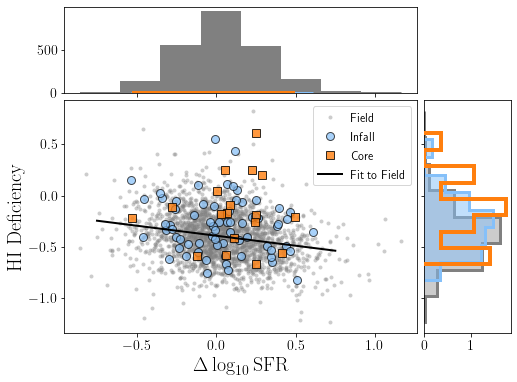

In [29]:
%%time
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --cutBT --BT 0.3 --minmass 9.7 --HIdef --minssfr -11.2
b.compare_HIdef()

# Figure 10

outfile =  /Users/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1305 1305 1305 1305
STD of pruned data = 0.15
STD of full data = 0.17
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.52
Best-fit inter = -5.32
Width of the MS = 0.17 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.52+/-0.05
Best-fit inter = -5.32+/-0.52
$Field$$\ norm$: 0.597 + 0.010 - 0.010
$Field$$\ low$: 0.374 + 0.026 - 0.027
$Infall$$\ norm$: 0.453 + 0.042 - 0.043
$Infall$$\ low$: 0.122 + 0.042 - 0.060
$Core$$\ norm$: 0.395 + 0.071 - 0.076
$Core$$\ low$: 0.062 + 0.038 - 0.090
CPU times: user 6.43 s, sys: 373 ms, total: 6.8 s
Wall time: 5.84 s


<Figure size 489.6x360 with 0 Axes>

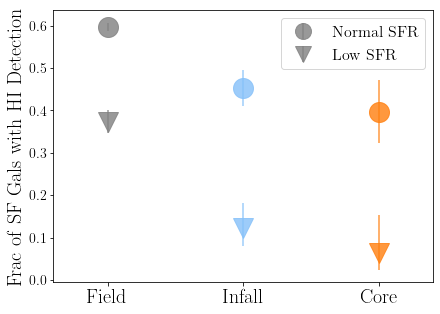

In [31]:
%%time 
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7  --ellip .75 --HIdef --minssfr -11.2 --cutBT --BT 0.3
b.get_HIfrac_SFR_env(plotsingle=True)
figname1 = homedir+'/research/LCS/plots/frac-HI-SFR-env.png'
figname2 = homedir+'/research/LCS/plots/frac-HI-SFR-env.pdf'
plt.savefig(figname1)
plt.savefig(figname2)

# Figure 11

outfile =  /Users/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1305 1305 1305 1305
STD of pruned data = 0.15
STD of full data = 0.17
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.52
Best-fit inter = -5.32
Width of the MS = 0.17 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.52+/-0.05
Best-fit inter = -5.32+/-0.52
number in parent sample =  301
number in low SFR sample =  73
number in normal SFR sample =  228
just checking, number of low sfr sample = 73
just checking, number of normal sfr sample = 228

delta R: normal vs suppressed
Anderson-Darling:  Anderson_ksampResult(statistic=-0.4867150502705297, critical_values=array([0.325, 1.226, 1.961, 

<Figure size 489.6x360 with 0 Axes>

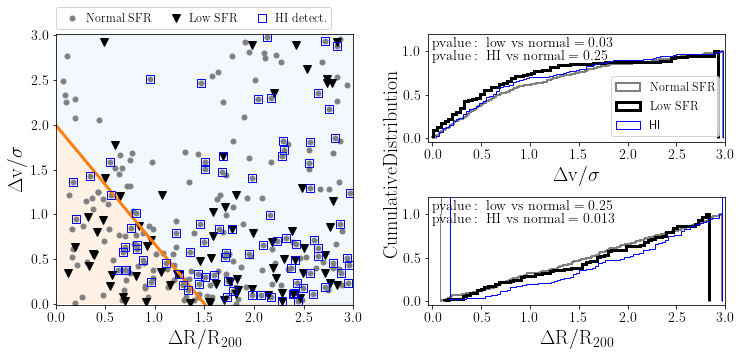

In [32]:
%%time
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7 --BT .3 --cutBT --ellip .75 --HIdef --minssfr -11.2
figname1 = homedir+'/research/LCS/plots/lcs-dvdr-sfgals_2panel.png'
figname2 = homedir+'/research/LCS/plots/lcs-dvdr-sfgals_2panel.pdf'
b.plot_dvdr_sfgals_2panel(figname1=figname1,figname2=figname2,HIflag=True)

# Figure 12 - cutting this

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.4
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1626 1626 1626 1626
STD of pruned data = 0.16
STD of full data = 0.21
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.49
Best-fit inter = -5.01
Width of the MS = 0.21 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.49+/-0.05
Best-fit inter = -5.01+/-0.53


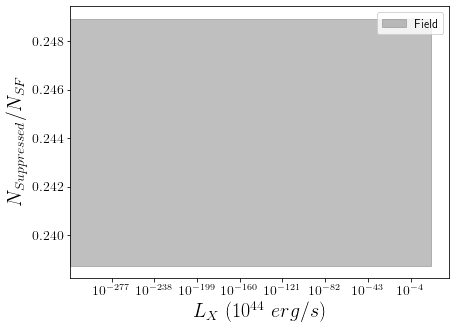

In [39]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7 --BT .4 --cutBT --ellip .75 --HIdef 
figname1 = homedir+'/research/LCS/plots/frac-suppressed-Lx.png'
figname2 = homedir+'/research/LCS/plots/frac-suppressed-Lx.pdf'
b.frac_suppressed_Lx()#figname1=figname1,figname2=figname2,HIflag=True)
plt.savefig(figname1)
plt.savefig(figname2)

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
STD of pruned data = 0.21
STD of full data = 0.27
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.30
Best-fit inter = -3.25
Width of the MS = 0.27 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.30+/-0.06
Best-fit inter = -3.25+/-0.59


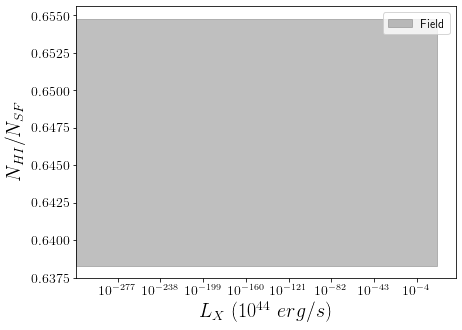

In [40]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7  --ellip .75 --HIdef 
figname1 = homedir+'/research/LCS/plots/frac-HI-Lx.png'
figname2 = homedir+'/research/LCS/plots/frac-HI-Lx.pdf'
b.frac_HI_Lx()#figname1=figname1,figname2=figname2,HIflag=True)
plt.savefig(figname1)
plt.savefig(figname2)